In [1]:
# Konfiguracja startowa
import pickle

DO_TRAIN = False  # czy trenowanie ma być wykonane na nowo, czy wczytane z dysku (jak z dysku to też zbiór testowy jest z dysku, augmentacja itd.)

def load_cache(fn):
    with open(fn, 'rb') as cf:
        return pickle.load(cf)


def write_cache(fn, data):
    with open(fn, 'wb') as cf:
        pickle.dump(data, cf)

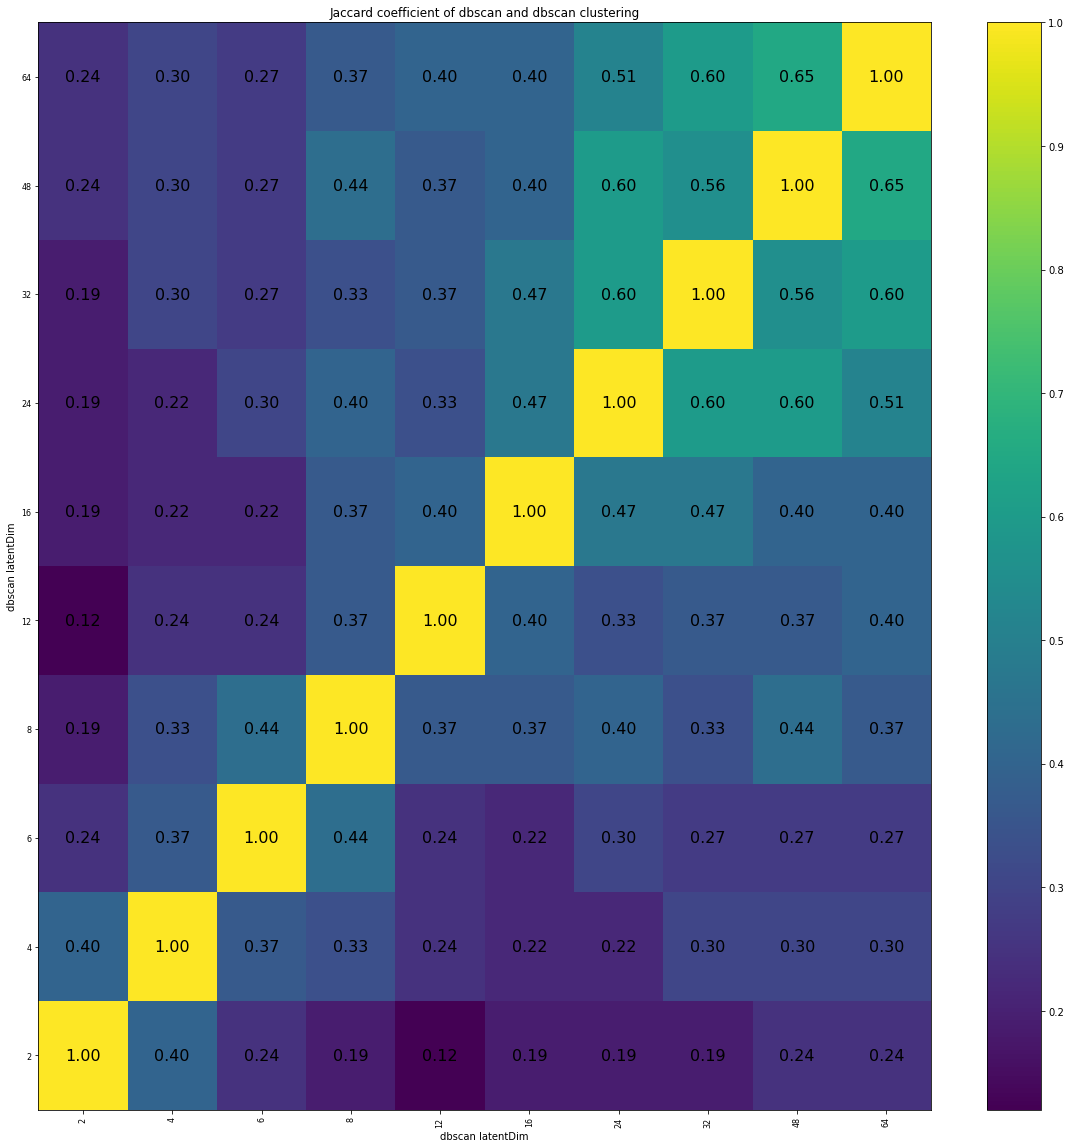

In [9]:
def JaccardSimilarity(A, B):
    div = len(set(A).union(B))
    if div > 0:
        return len(set(A).intersection(B)) / div
    else:
        return 0

def SorensenCoefficient(A, B):
    div = len(A) + len(B)
    if div > 0:
        return 2 * len(set(A).intersection(B)) / div
    else:
        return 0

def OverlapCoefficient(A, B):
    div = min(len(A),len(B))
    if div > 0:
        return len(set(A).intersection(B)) / div
    else:
        return 0

def similarity_3sigma(latentDims, method1, method2):
    import matplotlib.pyplot as plt
    import numpy as np

    #min_samples = [3, 4, 5, 6, 7, 8]
    min_samples = [5]

    #eps = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
    #eps = eps_used #list((np.asarray(range(26)) + 1) * 10)
    #eps = [1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
    #eps = [1.8]


    all_results1 = []

    lbls1 = []

    for latentDim in latentDims:
        output_file = "results_%s_%s_%d/clusters" % (method1, 'all', latentDim)
        for my_min_samples in min_samples:
            if method1 == 'AgglomerativeClustering':
                output_file_ok = output_file + ",eps=3sigma.txt"
            else:
                output_file_ok = output_file + ",eps=3sigma,min_samples=" + str(my_min_samples) + ".txt"
            help_results = []
            with open(output_file_ok, 'r') as fp:
                Lines = fp.readlines()
                for line in Lines:
                    help_results.append(int(line))

            all_results1.append(help_results)
            #lbls.append("start=" + str(my_start_coord) + ",end=" + str(my_end_coord) \
            #                 + ",eps=" + str(my_eps) + ",min_samples=" + str(my_min_samples))
            lbls1.append(str(latentDim))

    all_results2 = []

    lbls2 = []

    for latentDim in latentDims:
        output_file = "results_%s_%s_%d/clusters" % (method2, 'all', latentDim)
        for my_min_samples in min_samples:
            if method2 == 'AgglomerativeClustering':
                output_file_ok = output_file + ",eps=3sigma.txt"
            else:
                output_file_ok = output_file + ",eps=3sigma,min_samples=" + str(my_min_samples) + ".txt"
            help_results = []
            with open(output_file_ok, 'r') as fp:
                Lines = fp.readlines()
                for line in Lines:
                    help_results.append(int(line))

            all_results2.append(help_results)
            #lbls.append("start=" + str(my_start_coord) + ",end=" + str(my_end_coord) \
            #                 + ",eps=" + str(my_eps) + ",min_samples=" + str(my_min_samples))
            lbls2.append(str(latentDim))

    p = np.zeros((len(all_results1), len(all_results2)))

    #ax.pcolor(np.random.randn((10,10)))
    #ax.pcolor(np.random.randn(10), np.random.randn(10))

    for a in range(0, len(all_results1)):
        #for b in range(a + 1, len(all_results2)):
        for b in range(0, len(all_results2)):
            p[a,b] = OverlapCoefficient(all_results1[a], all_results2[b])
            p[a, b] = SorensenCoefficient(all_results1[a], all_results2[b])
            p[a, b] = JaccardSimilarity(all_results1[a], all_results2[b])
        #lbls.append(str(a))

    #p = ax.pcolormesh(np.random.randn(10,10))
    #p = ax.pcolormesh(p)
    #fig.colorbar(p)
    plt.figure(figsize=(20, 20))
    cm = plt.pcolormesh(p)
    plt.colorbar(cm)

    plt.yticks(np.arange(0.5, len(lbls1) + 0.5), lbls1,fontsize=8)
    plt.xticks(np.arange(0.5, len(lbls2) + 0.5), lbls2, rotation=90, fontsize=8)

    plt.xlabel("%s latentDim" % method2)
    plt.ylabel("%s latentDim" % method1)
    plt.title("Overlap coefficient of Agglomerative and DBSCAN clustering")
    plt.title("Sorensen coefficient of Agglomerative and DBSCAN clustering")
    plt.title("Jaccard coefficient of %s and %s clustering" % (method1, method2))

    #for a in range(0, len(all_results)):
    #    for b in range(a + 1, len(all_results)):
    for a in range(len(all_results1)):
        for b in range(len(all_results2)):
            #if a > b:
                plt.text(b+0.5,(a+0.5),"{:.2f}".format((p[a,b])),
                    ha='center',va='center',
                    size=16,color='black')

    plt.show()

used_latentDim = [2, 4, 6, 8, 12, 16, 24, 32, 48, 64]
#used_latentDim = [16]
#for latentDim in used_latentDim:
    #all_embedding = encoder_embedding(ALL_AC % latentDim, all_set)
similarity_3sigma(used_latentDim, 'dbscan', 'dbscan')

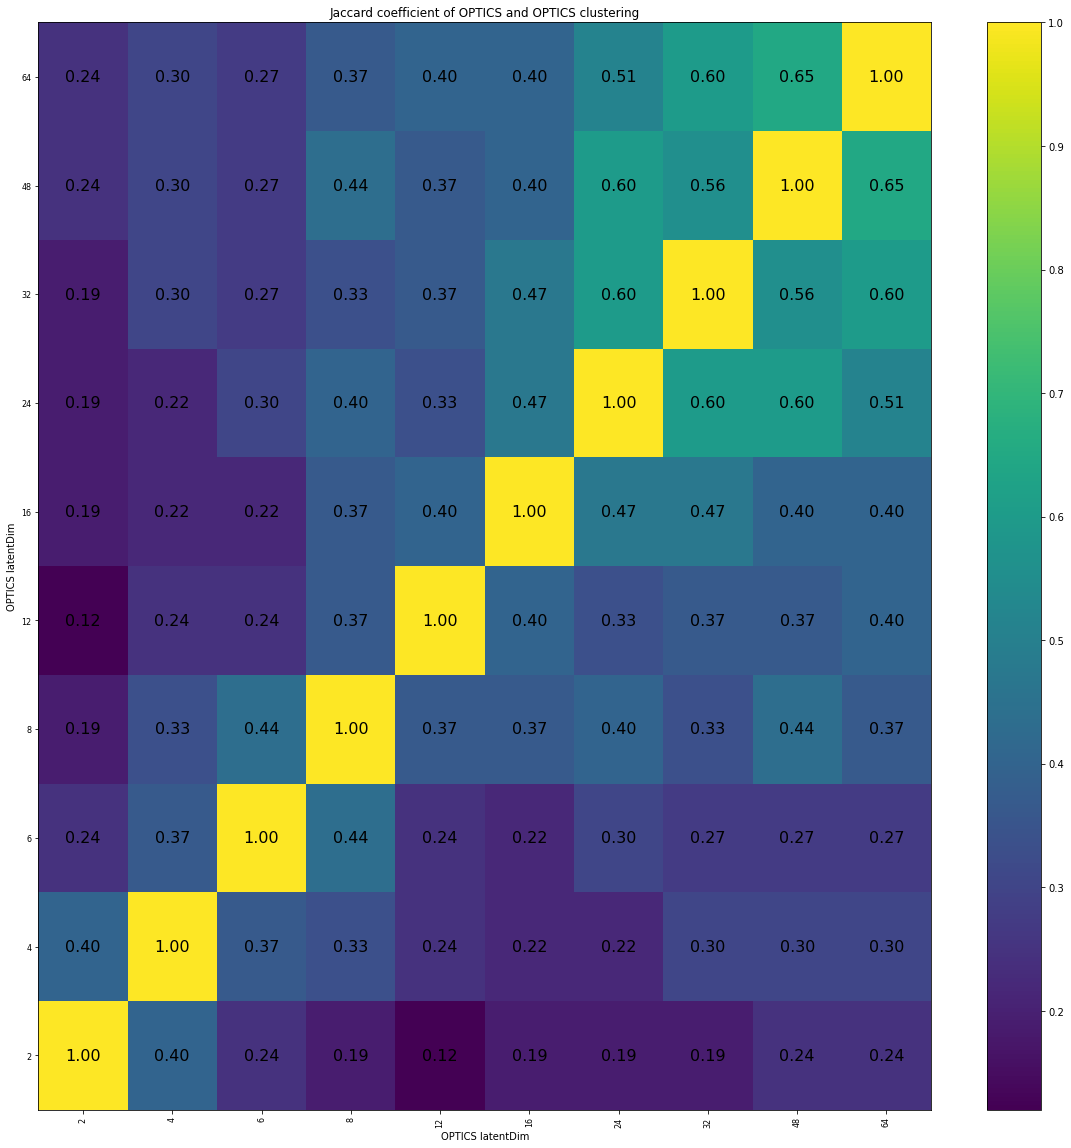

In [10]:
similarity_3sigma(used_latentDim, 'OPTICS', 'OPTICS')

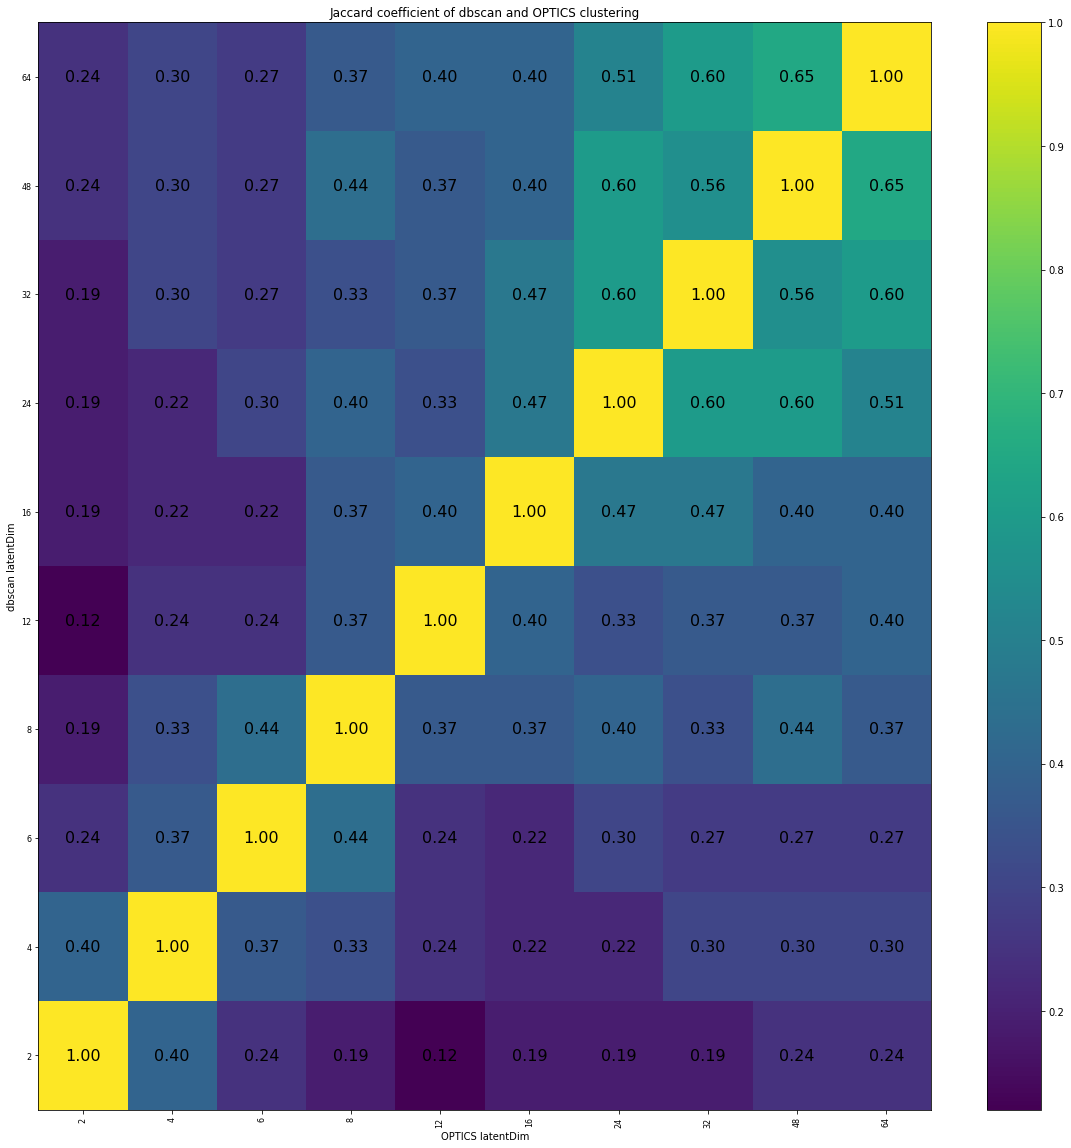

In [11]:
similarity_3sigma(used_latentDim, 'dbscan', 'OPTICS')

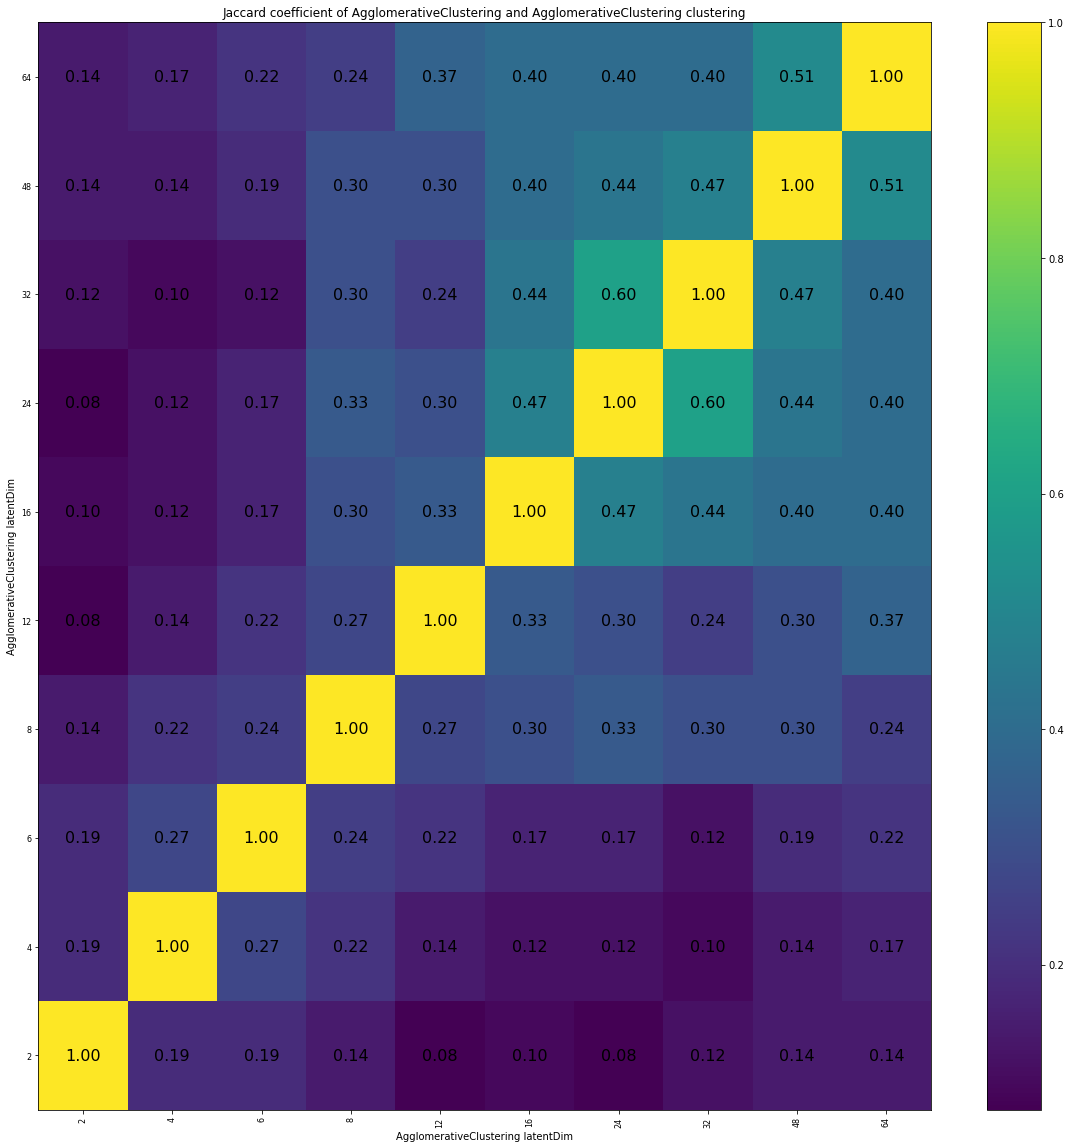

In [12]:
similarity_3sigma(used_latentDim, 'AgglomerativeClustering', 'AgglomerativeClustering')

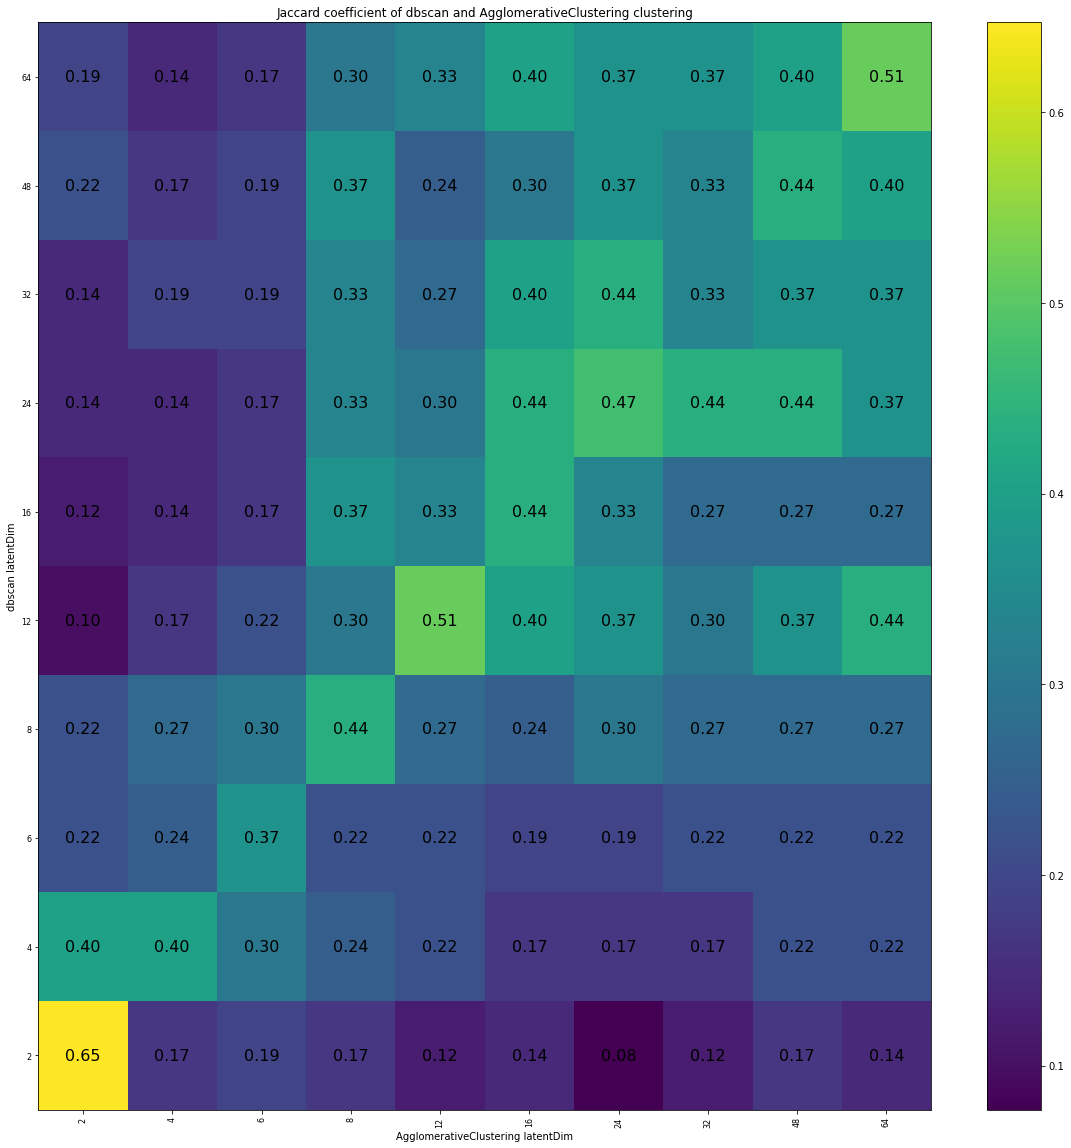

In [13]:
similarity_3sigma(used_latentDim, 'dbscan', 'AgglomerativeClustering')

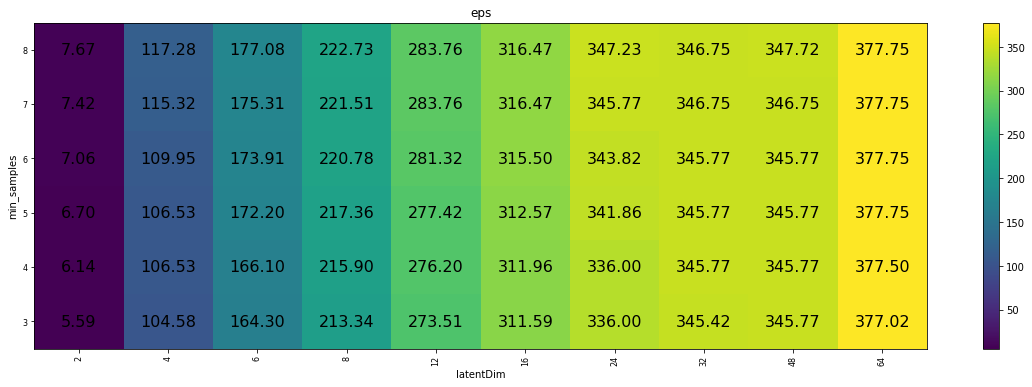

In [23]:
def similarity_3sigma(latentDims, method):
    import matplotlib.pyplot as plt
    import numpy as np

    min_samples = [3, 4, 5, 6, 7, 8]
    #min_samples = [5]

    #eps = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
    #eps = eps_used #list((np.asarray(range(26)) + 1) * 10)
    #eps = [1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
    #eps = [1.8]


    p = np.zeros((len(min_samples), len(latentDims)))

    lbls1 = min_samples
    lbls2 = latentDims

    for i in range(len(latentDims)):
        latentDim = latentDims[i]
        output_file = "results_%s_%s_%d/3sigma.txt" % (method, 'all', latentDim)
        for j in range(len(min_samples)):
            my_min_samples = min_samples[j]
            with open(output_file, 'r') as fp:
                Lines = fp.readlines()
                for line in Lines:
                    sam, eps = line.split(',')
                    if int(sam) == my_min_samples:
                        p[j][i] = float(eps)
                        break

    plt.figure(figsize=(20, 6))
    cm = plt.pcolormesh(p)
    plt.colorbar(cm)

    plt.yticks(np.arange(0.5, len(lbls1) + 0.5), lbls1,fontsize=8)
    plt.xticks(np.arange(0.5, len(lbls2) + 0.5), lbls2, rotation=90, fontsize=8)

    plt.xlabel("latentDim")
    plt.ylabel("min_samples")
    #plt.title("Overlap coefficient of Agglomerative and DBSCAN clustering")
    #plt.title("Sorensen coefficient of Agglomerative and DBSCAN clustering")
    #plt.title("Jaccard coefficient of %s and %s clustering" % (method1, method2))
    plt.title("eps")

    #for a in range(0, len(all_results)):
    #    for b in range(a + 1, len(all_results)):
    for a in range(len(latentDims)):
        for b in range(len(min_samples)):
            #if a > b:
                plt.text(a+0.5,(b+0.5),"{:.2f}".format((p[b,a])),
                    ha='center',va='center',
                    size=16,color='black')

    plt.show()

used_latentDim = [2, 4, 6, 8, 12, 16, 24, 32, 48, 64]
#used_latentDim = [16]
#for latentDim in used_latentDim:
    #all_embedding = encoder_embedding(ALL_AC % latentDim, all_set)
similarity_3sigma(used_latentDim, 'dbscan')

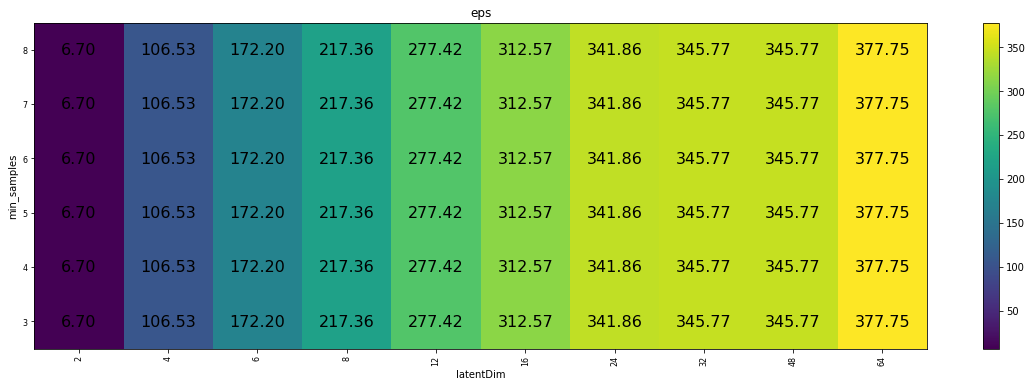

In [24]:
similarity_3sigma(used_latentDim, 'OPTICS')

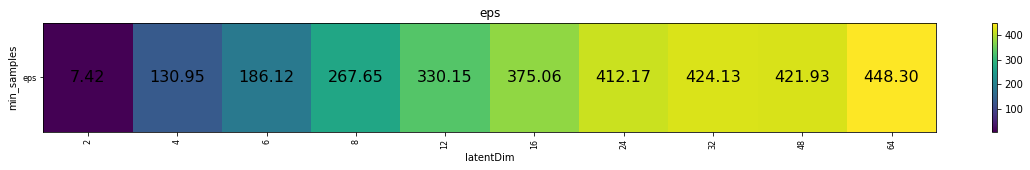

In [27]:
def similarity_3sigma_agl(latentDims, method):
    import matplotlib.pyplot as plt
    import numpy as np

    p = np.zeros((1, len(latentDims)))

    lbls1 = ['eps']
    lbls2 = latentDims

    for i in range(len(latentDims)):
        latentDim = latentDims[i]
        output_file = "results_%s_%s_%d/3sigma.txt" % (method, 'all', latentDim)
        with open(output_file, 'r') as fp:
            Lines = fp.readlines()
            for line in Lines:
                p[0][i] = float(line)
                break

    plt.figure(figsize=(20, 2))
    cm = plt.pcolormesh(p)
    plt.colorbar(cm)

    plt.yticks(np.arange(0.5, len(lbls1) + 0.5), lbls1,fontsize=8)
    plt.xticks(np.arange(0.5, len(lbls2) + 0.5), lbls2, rotation=90, fontsize=8)

    plt.xlabel("latentDim")
    plt.ylabel("min_samples")
    #plt.title("Overlap coefficient of Agglomerative and DBSCAN clustering")
    #plt.title("Sorensen coefficient of Agglomerative and DBSCAN clustering")
    #plt.title("Jaccard coefficient of %s and %s clustering" % (method1, method2))
    plt.title("eps")

    #for a in range(0, len(all_results)):
    #    for b in range(a + 1, len(all_results)):
    for a in range(len(latentDims)):
            #if a > b:
                plt.text(a+0.5,(0.5),"{:.2f}".format((p[0,a])),
                    ha='center',va='center',
                    size=16,color='black')

    plt.show()


similarity_3sigma_agl(used_latentDim, 'AgglomerativeClustering')